# DS106-05-10-ML - Lesson 5 Hands-On:<br>Natural Language Processing

For this hands-on, you will be using _Alice's Adventures in Wonderland_ by Lewis Carroll to practice your newfound NLP skills. 

---

## Import Packages
>- `requests` —⨠ to read in data from a webpage
>- `BeautifulSoup` —⨠ to process raw data
>- `nltk` —⨠ as the definitive natural language processing package 
>- `RegexpTokenizer` —⨠ to break down data into words
>- `matplotlib` and `seaborn` —⨠ to visualize word frequency counts

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
## Fetch Data
---

#### Read In Text Data
> - assign URL of target webpage to variable name `url`

In [2]:
url = 'https://www.gutenberg.org/files/11/11-h/11-h.htm'

#### Request Data
> - function `requests.get()` requests data from specified URL
> - assign requested data to variable `r`

In [3]:
r = requests.get(url)

---
#### Convert Text to Soup
>- `r.text` specifies the text from previous requested data
>- `BeautifulSoup()` with HTML Library (`html5lib`) converts the HTML text to _soup_ for processing, assigned to variable `soup`
>- use `type()` to confirm _soup_ type

In [4]:
html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

--- 
## Tokenize the Data
_Tokens_ are the text broken down into words.
>1. function `get_text()` retrieves desired text
>2. function `RegexpTokenizer()` breaks it down into words,<br>separator specified by argument `\w+` for "space"
>3. function `tokenize()` will actually perform the operation;<br>return first `10` words with argument `[:10]`:

In [5]:
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland']

---
## Text Pre-Processing
---

### Lowercasing
Remove capitalization with a `for` loop.
>1. creates a `for` loop
>2. function `lower()` strips caps
>3. assigns the results to a dictionary called `words`
>4. Look at the first `5` entries in the dictionary

In [6]:
words = []
for word in tokens:
    words.append(word.lower())

words[:5]

['the', 'project', 'gutenberg', 'ebook', 'of']

---
### Stopword Removal
#### 1. Create list of stopwords from `nltk` package
> 1. call `nltk` list of _stopwords_
> 2. assign to variable `stopwords`
> 3. Look at the first `10` stopwords identified in the text

In [7]:
stopwords = nltk.corpus.stopwords.words('english')

#### 2. Filter out stopwords in the text with a `for` loop
>1. creates a `for` loop
>2. makes a dictionary named `wordsWithoutStops` that filters out all the stopwords

In [8]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)

#### 3. Check resulting words without stops:

In [9]:
wordsWithoutStops[:10]

['project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'project',
 'gutenberg']

---
## Data Visualization
---

### Word Frequency Counts
> 1. function `nltk.FreqDist()` returns frequency counts for all words in the `wordsWithoutStops` dictionary
> 2. assign results to variable `freqencyDis`

In [10]:
frequencyDis = nltk.FreqDist(wordsWithoutStops)

### Plot Word Frequency

Plot the word freqency counts:
> 1. `sns.set()` applies default `seaborn` theme, scaling, and color palette
> 2. command `.plot()` from `matplotlib`
> 3. argument in `([integer])` specifies to plot only top `[integer]` of words

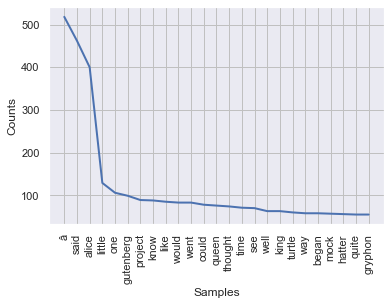

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
sns.set()
frequencyDis.plot(25)

---
# ☙ Fin. ❧